In [ ]:
import os, sys
sys.path.append(os.path.split(os.getcwd())[0])

In [2]:
import scripts.collect_data as collect
import scripts.transform_data as transform
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from glob import glob

In [3]:
from scipy import interpolate

# Download and transform data associated with models

|     |     |     |     |     |     |     |     |
|-----|-----|-----|-----|-----|-----|-----|-----|
|Infected |Recovered | Deaths | Population | Temperature | Humidity | Wind Speed | Test Rate |
|IRD[0] | IRD[1] | IRD[2] | pop| THW[0] | THW[1] | THW[2] | test 

## Download John's Hopkins Infection, Recovery and Death data

In [102]:
collect.IRD()

Infection, Recovery and Death data saved @ /data/COVID-19/covid19/data/IRD


'/data/COVID-19/covid19/data/IRD'

In [103]:
IRD = transform.IRD(min_confirmed=0, min_recovered=0, min_deaths=0)

[265, 252, 265]


## Download weather data using Dark Sky API (max 1000/day)

In [104]:
collect.weather()

100%|██████████| 264/264 [39:41<00:00,  9.02s/it]

Weather data saved @ /data/COVID-19/covid19/data/weather/json/


'/data/COVID-19/covid19/data/weather/json/'

In [105]:
THW = transform.weather(update=True)

100%|██████████| 264/264 [00:24<00:00, 10.63it/s]


Weather data saved @ /data/COVID-19/covid19/data/weather


In [43]:
THW[0]

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,9.908750,9.908750,9.908750,9.908750,9.908750,9.908750,9.908750,9.908750,9.908750,9.908750,...,10.455833,11.140417,14.014583,12.852083,13.083333,11.259167,11.865833,13.893333,13.997917,14.586250
Albania,6.367500,6.367500,6.367500,6.367500,6.367500,6.367500,6.367500,6.367500,6.367500,6.367500,...,6.099167,5.885833,8.513750,11.061250,11.970000,12.524583,12.906667,13.200833,14.398750,15.447083
Algeria,22.660417,22.660417,22.660417,22.660417,22.660417,22.660417,22.660417,22.660417,22.660417,22.660417,...,23.765000,24.420833,22.214167,21.802500,22.341250,23.265000,24.711250,25.454167,25.868333,27.485000
Andorra,5.491667,5.491667,5.491667,5.491667,5.491667,5.491667,5.491667,5.491667,5.491667,5.491667,...,6.207500,5.969583,5.847917,7.210417,7.164583,8.049583,8.455417,9.774583,9.976667,10.343333
Angola,22.600833,22.600833,22.600833,22.600833,22.600833,22.600833,22.600833,22.600833,22.600833,22.600833,...,23.860417,21.522917,21.160833,21.392500,21.601667,22.343333,22.445417,21.167917,22.607917,20.617500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
France / Saint Pierre and Miquelon,-5.152083,-2.133750,-0.276667,-3.060417,-0.559583,1.756667,-0.192917,-1.829167,-2.558333,-3.030417,...,3.360417,3.341250,2.525000,0.357500,0.003750,0.393333,NaN,NaN,NaN,NaN
South Sudan,26.382917,25.572500,25.743333,27.002083,28.325833,27.887500,26.995000,27.057917,27.706250,28.875833,...,31.995000,33.312500,33.655000,32.891250,30.714167,30.900417,NaN,NaN,NaN,NaN
Western Sahara,14.366250,16.211250,18.001667,18.052500,17.400417,17.236667,20.045000,21.201667,19.498750,18.992917,...,24.073750,24.551667,23.005000,21.618333,23.677500,25.290417,NaN,NaN,NaN,NaN


## Download population data from Worldometer

In [44]:
collect.population()

Population data saved @ /data/COVID-19/covid19/data/population/populations_raw.csv


'/data/COVID-19/covid19/data/population/populations_raw.csv'

In [23]:
pop = transform.population()
len(pop)

Number of unmatched regions : 46
Population data saved @ /data/COVID-19/covid19/data/population/populations.csv


1

In [24]:
pop

,Australia / New South Wales,Australia / Queensland,Australia / South Australia,Australia / Victoria,Australia / Western Australia,Denmark / Faroe Islands,France / Guadeloupe,France / Reunion,United Kingdom / Channel Islands,West Bank and Gaza,...,Libya,Guinea-Bissau,Mali,Botswana,Burundi,Sierra Leone,Malawi,South Sudan,Western Sahara,Yemen
Population,8117976,5115451,1756494,6629870,2630557,51783,395700,859959,170499,3340143,...,6871292,1968001,20250833,2351627,11890784,7976983,19129952,11193725,597339,29825964


# BCG ATLAS Data

In [6]:
files = glob('../data/BCG/BCG/*.csv')
dfs = []
for i in range(len(files)):
    cols = []
    data = []
    with open(files[i], 'r') as fp:
        for line in fp.readlines():
            qa = line.split(',')
            cols.append(qa[0].rstrip())
            data.append(''.join(qa[1:]).rstrip())
            
    dfs.append(pd.DataFrame(data=[data], columns=cols, index=[i]))
    
bcg_df = pd.concat(dfs)
bcg_df['Last updated'] = bcg_df['updated_in']
bcg_df['Country'] = bcg_df['name']
bcg_df.drop(['Question', 'name', 'updated_in'], axis=1, inplace=True)
bcg_df.set_index('Country', inplace=True)
for col in ['TB Incidence (Count)', 'TB Incidence (per 100 000 per year)']:
    bcg_df[col] = bcg_df[col].apply(pd.to_numeric, args=['coerce'])

In [7]:
print(f'Total number of countries : {len(bcg_df)}')

Total number of countries : 223


# Current policy with start year

In [8]:
change_sy = ['Ukraine', 'Switzerland', 'Australia', 'Ireland', 'Taiwan', 
             'Montenegro', 'Ethiopia', 'Hong Kong', 'Singapore', 'Chile', 
             'Korea Rep.', 'Serbia', 'Isle of Man', 'Latvia', 'Japan']
# Estimate from BCG ATLAS data
change_sy_new = [1975, 1965, 1955, 1955, 1951, 1927, 1983, 1959, 
                 1955, 1948, 1975, 1927, 1955, 1950, 1956]

for c, new_val in zip(change_sy, change_sy_new):
    bcg_df['Which year was vaccination introduced?'][c] = new_val
for col in ['Which year was vaccination introduced?',]:
    bcg_df[col] = bcg_df[col].apply(pd.to_numeric, args=['coerce'])

In [9]:
countries = bcg_df[(~bcg_df['Which year was vaccination introduced?'].isnull()) & \
                   (bcg_df['Current BCG vaccination?']=='Yes')].index.values
print(f'Countries with a current BCG policy and a start year : \n\n{countries}\nTotal : {len(countries)}')

Countries with a current BCG policy and a start year : 

['Hungary' 'Croatia' 'South Africa' 'Peru' 'Saudi Arabia' 'Sudan'
 'Indonesia' 'Armenia' 'El Salvador' 'Colombia' 'India'
 'Marshall Islands Rep.' 'Romania' 'Poland' 'Rwanda' 'Turkey' 'Nigeria'
 'Ukraine' 'Macedonia FYR' 'Mongolia' 'Bulgaria' 'mexico' 'Bhutan'
 'Uganda' 'Sierra Leone' 'Thailand' 'Gambia The' 'Senegal' 'Ireland'
 'Uruguay' 'Vietnam' 'Angola' 'Taiwan' 'Montenegro' 'Ethiopia' 'Hong Kong'
 'Singapore' 'Greenland' 'Pakistan' 'Chile' 'Bangladesh' 'Brazil'
 'Korea Rep.' 'Serbia' 'Bosnia and Herzegovina' 'Latvia' 'Japan'
 'Tanzania' 'Iran Islamic Rep.']
Total : 49


# No current policy but have start and end years

In [10]:
change_ey = ['Australia', 'Israel']
# Estimate from BCG ATLAS data
change_ey_new = [1985, 1982]

for c, new_val in zip(change_ey, change_ey_new):
    bcg_df['Year BCG stopped?'][c] = new_val
    
bcg_df['Year BCG stopped?'] = bcg_df['Year BCG stopped?'].apply(pd.to_numeric, args=['coerce'])

In [11]:
countries = bcg_df[(~bcg_df['Which year was vaccination introduced?'].isnull()) & \
                   (~bcg_df['Year BCG stopped?'].isnull()) & \
                   (bcg_df['Current BCG vaccination?']=='No')].index.values
print('Countries with NO current BCG policy with start year and end years' + \
      f' \n\n{countries}\nTotal : {len(countries)}')

Countries with NO current BCG policy with start year and end years 

['United Kingdom' 'Slovak Republic' 'Slovenia' 'Germany' 'Switzerland'
 'Israel' 'Australia' 'France' 'Denmark' 'Czech Republic' 'Sweden' 'Spain'
 'Isle of Man' 'Austria' 'Finland']
Total : 15


# No current policy with no record in the past 

In [12]:
countries = bcg_df[(bcg_df['Which year was vaccination introduced?'].isnull()) & \
                   (bcg_df['Year BCG stopped?'].isnull()) & \
                   (bcg_df['Current BCG vaccination?']=='No')].index.values
print(f'Countries with NO current BCG policy and no history \n\n{countries}\nTotal : {len(countries)}')

Countries with NO current BCG policy and no history 

['Canada' 'Ecuador' 'United States of America' 'Netherlands' 'Italy'
 'Andorra' 'Belgium' 'Lebanon' 'Luxembourg']
Total : 9


In [13]:
bcg_df[['Income group (World Bank)', 
        'Current BCG vaccination?', 
        'Which year was vaccination introduced?', 
        'Year BCG stopped?',
        'Details of changes',
        'Year of changes to BCG schedule',
        'BCG coverage (%)',
        'BCG Recommendation Type']].T[countries].T

,Income group (World Bank),Current BCG vaccination?,Which year was vaccination introduced?,Year BCG stopped?,Details of changes,Year of changes to BCG schedule,BCG coverage (%),BCG Recommendation Type
Country,,,,,,,,
Canada,High income,No,NaN,NaN,2011 data: Discontinuation of routine BCG vacc...,2011 data: 1960s-1970s,NaN,BCG recommendation only for specific groups or...
Ecuador,Upper middle income,No,NaN,NaN,NaN,NaN,NaN,Past national BCG vaccination policy for all
United States of America,High income,No,NaN,NaN,None,None,NaN,BCG recommendation only for specific groups or...
Netherlands,High income,No,NaN,NaN,1979: Discontinuation of vaccination healthcar...,1979 2005 2016,NaN,BCG recommendation only for specific groups or...
Italy,High income,No,NaN,NaN,1970: Compulsory BCG vaccination was introduce...,1970 2001,NaN,BCG recommendation only for specific groups or...
Andorra,High income,No,NaN,NaN,NaN,NaN,NaN,Past national BCG vaccination policy for all
Belgium,High income,No,NaN,NaN,1989: Stopped vaccinations for healthcare or o...,1989 1995 2013,NaN,BCG recommendation only for specific groups or...
Lebanon,Upper middle income,No,NaN,NaN,NaN,NaN,NaN,BCG recommendation only for specific groups or...
Luxembourg,High income,No,NaN,NaN,NaN,NaN,NaN,Past national BCG vaccination policy for all


# Outliers

## No data for policy direction

In [14]:
countries = bcg_df[(bcg_df['Current BCG vaccination?']!='No') & \
                   (bcg_df['Current BCG vaccination?']!='Yes')].index.values
print(f'Countries with (NA) BCG policy data \n\n{countries}\nTotal : {len(countries)}')

Countries with (NA) BCG policy data 

['South Sudan' 'Curacao' 'Antigua and Barbuda' 'Niue'
 'Bonaire Saint Eustatius and Saba' 'Korea Dem. Rep.' 'Cayman Islands'
 'Montserrat' 'San Marino' 'Aruba' 'Virgin Islands (British)' 'Grenada'
 'Tuvalu' 'Gibraltar' 'Sint Maarten (Dutch part)' 'French Polynesia'
 'Faroe Islands' 'Cook Islands' 'Northern Mariana Islands' 'Palau'
 'American Samoa' 'Nauru' 'New Caledonia' 'Liechtenstein' 'Mayotte'
 'St. Martin (french part)' 'Puerto Rico' 'Guam' 'Suriname' 'Bahrain'
 'Virgin Islands (U.S.)' 'Turks and Caicos Islands' 'Bahamas The'
 'Iceland' 'Macao China' 'Bermuda' 'Brunei Darussalam' 'Monaco'
 'Wallis and Futuna Islands' 'Trinidad and Tobago' 'Kosovo' 'Anguilla'
 'Cyprus']
Total : 43


## No current BCG policy (end year but no start year)

In [15]:
countries = bcg_df[(bcg_df['Current BCG vaccination?']=='No') & \
                   (~bcg_df['Which year was vaccination introduced?'].isnull()) & \
                   (bcg_df['Year BCG stopped?'].isnull())].index.values
print('Countries with NO current BCG policy with end date but no start date' + \
      f'\n\n{countries}\nTotal : {len(countries)}')

Countries with NO current BCG policy with end date but no start date

['New Zealand']
Total : 1


New Zealand introduced vaccines in 1948 to 13 yo according to [Wiki](https://en.wikipedia.org/wiki/BCG_vaccine#cite_note-43)

In [16]:
bcg_df['Details of changes']['New Zealand']

'1948: BCG Immunisation was first introduced for 13 yr olds 1963-1990: Phased out vaccination'

In [17]:
bcg_df[['Current BCG vaccination?', 
        'Which year was vaccination introduced?', 
        'Year BCG stopped?',
        'Details of changes']].T[['New Zealand']].T

,Current BCG vaccination?,Which year was vaccination introduced?,Year BCG stopped?,Details of changes
Country,,,,
New Zealand,No,1976,NaN,1948: BCG Immunisation was first introduced fo...


## No current BCG policy (start year but no end year)

In [18]:
countries = bcg_df[(bcg_df['Current BCG vaccination?']=='No') & \
                   (bcg_df['Which year was vaccination introduced?'].isnull()) & \
                   (~bcg_df['Year BCG stopped?'].isnull())].index.values
print('Countries with NO current BCG policy with end date but no start date' + \
      f'\n\n{countries}\nTotal : {len(countries)}')

Countries with NO current BCG policy with end date but no start date

['Norway']
Total : 1


Norway introduced vaccines in 1947 according to [Wiki](https://en.wikipedia.org/wiki/BCG_vaccine#cite_note-43)

In [19]:
bcg_df[['Current BCG vaccination?', 'Which year was vaccination introduced?', 'Year BCG stopped?']].T[['Norway']].T

,Current BCG vaccination?,Which year was vaccination introduced?,Year BCG stopped?
Country,,,
Norway,No,NaN,2009


## Current policy without start dates

In [20]:
unknown_sy = ['Canada', 'Estonia', 'Italy', 'Argentina']  
unknown_ey = ['Canada', 'Italy']

In [21]:
countries = bcg_df[(bcg_df['Current BCG vaccination?']=='Yes') & \
                   (bcg_df['Which year was vaccination introduced?'].isnull())].index.values
print('Countries with a current BCG policy but no start date' + \
      f'\n\n{countries}\nTotal : {len(countries)}')

Countries with a current BCG policy but no start date

['Sri Lanka' 'Venezuela' 'Iraq' 'Malawi' 'Estonia' 'Somalia' 'Liberia'
 'Belize' 'Mauritania' 'Philippines' 'Chad' 'Kiribati' 'Burundi'
 'Portugal' 'Dominica' 'Kyrgyz Republic' 'Afghanistan' 'Guatemala'
 'Morocco' 'Malaysia' 'West Bank and Gaza' 'Timor-Leste' 'Moldova'
 'St. Lucia' 'Dominican Republic' 'Namibia' 'Equatorial Guinea'
 'Nicaragua' 'Micronesia Fed. Sts.' 'Bolivia' 'Ghana' 'Cameroon' 'Cuba'
 'Solomon Islands' 'Gabon' 'Jordan' 'Greece' 'Central African Republic'
 'Tunisia' 'Guinea-Bissau' 'St. Vincent and the Grenadines' 'Mauritius'
 'Mali' "Cote d'Ivoire" 'Vanuatu' 'United Arab Emirates' 'Cambodia'
 'Jamaica' 'Azerbaijan' 'Swaziland' 'Mozambique' 'Maldives' 'Djibouti'
 'Malta' 'Sao Tome and Principe' 'Barbados' 'Georgia' 'Qatar' 'Zimbabwe'
 'Samoa' 'Guyana' 'Kazakhstan' 'Comoros' 'Myanmar' 'Panama' 'Haiti'
 'Zambia' 'Burkina Faso' 'Kuwait' 'Cape Verde' 'Libya' 'Yemen Rep.'
 'Papua New Guinea' 'Paraguay' 'Syrian Arab Rep

In [22]:
# bcg_df.columns.values

In [23]:
# bcg_df[['Income group (World Bank)', 
#         'Current BCG vaccination?', 
#         'Which year was vaccination introduced?', 
#         'Year BCG stopped?',
#         'Details of changes',
#         'Year of changes to BCG schedule',
#         'BCG coverage (%)',
#         'BCG Policy Link']].T[countries].T.head(50)

In [24]:
# bcg_df[['Income group (World Bank)',
#         'Current BCG vaccination?', 
#         'Which year was vaccination introduced?', 
#         'Year BCG stopped?',
#         'Details of changes',
#         'Year of changes to BCG schedule', 
#         'BCG coverage (%)',
#         'BCG Policy Link']].T[countries].T.iloc[50:100]

In [25]:
# bcg_df[['Income group (World Bank)',
#         'Current BCG vaccination?', 
#         'Which year was vaccination introduced?', 
#         'Year BCG stopped?',
#         'Details of changes',
#         'Year of changes to BCG schedule',
#         'BCG coverage (%)',
#         'BCG Policy Link']].T[countries].T.tail(6)

In [26]:
len(bcg_df) - 49 - 15 - 9 - 43 - 105 - 1 - 1

0

In [27]:
no_data_countries = bcg_df[(bcg_df['Current BCG vaccination?']=='Yes') & \
                           (bcg_df['Which year was vaccination introduced?'].isnull())].index.values

In [28]:
len(no_data_countries)

105

# BCG WHO Data

In [29]:
who_df = pd.read_csv('../data/BCG/WHO_BCG_policy.csv')
years = who_df.iloc[0].values[1:].astype(int)
countries = who_df[who_df.columns.values[0]].values[1:]
data = who_df.values[1:,1:].astype(float)
who_df = pd.DataFrame(data.T, columns=countries, index=years).T
who_df = who_df/100
who_df[who_df.isnull()] = 0.0

In [30]:
who_df

,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,...,1989,1988,1987,1986,1985,1984,1983,1982,1981,1980
Afghanistan,0.78,0.78,0.78,0.76,0.74,0.72,0.78,0.71,0.68,0.64,...,0.38,0.40,0.27,0.18,0.17,0.11,0.10,0.10,0.00,0.00
Albania,0.99,0.99,0.99,0.99,0.99,0.99,0.96,0.97,0.99,0.97,...,0.94,0.92,0.92,0.92,0.92,0.90,0.90,0.92,0.93,0.93
Algeria,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,...,0.96,0.96,0.93,0.88,0.86,0.00,0.00,0.00,0.00,0.00
Angola,0.86,0.83,0.49,0.69,0.72,0.71,0.73,0.74,0.79,0.70,...,0.47,0.32,0.29,0.32,0.28,0.28,0.25,0.00,0.00,0.00
Argentina,0.93,0.95,0.92,0.96,0.99,0.99,0.99,0.99,0.99,0.99,...,0.92,0.91,0.94,0.99,0.90,0.78,0.70,0.77,0.70,0.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),0.92,0.94,0.97,0.99,0.97,0.95,0.96,0.95,0.92,0.91,...,0.88,0.76,0.63,0.86,0.89,0.92,0.82,0.76,0.77,0.72
Viet Nam,0.95,0.97,0.95,0.97,0.96,0.95,0.98,0.98,0.94,0.97,...,0.94,0.79,0.59,0.55,0.50,0.48,0.04,0.00,0.00,0.00
Yemen,0.64,0.66,0.73,0.47,0.73,0.71,0.64,0.59,0.65,0.58,...,0.75,0.52,0.30,0.23,0.20,0.16,0.15,0.13,0.12,0.09
Zambia,0.91,0.99,0.99,0.97,0.99,0.95,0.92,0.92,0.92,0.92,...,0.97,0.97,0.97,0.95,0.92,0.71,0.68,0.70,0.72,0.00


# WHO Age Data

In [31]:
columns=['Variant','Region,Subregion,Country','Notes','Country code','Type','Parent code',
         'Reference date (as of 1July)','0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39',
         '40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80-84','85-89','90-94','95-99','100+']
df = pd.read_excel('../data/population/WPP2019_POP_F07_1_POPULATION_BY_AGE_BOTH_SEXES.xlsx', skiprows=406, index_col=0)
df.columns =  columns

In [32]:
age_df = df[(df['Reference date (as of 1July)']==2020) & (df['Type']=='Country/Area')]
age_df.drop(columns=['Variant', 'Notes', 'Country code', 'Type', 'Parent code', 'Reference date (as of 1July)'], 
            inplace=True)
age_df.set_index(age_df.columns[0], inplace=True, )
age_df.index.rename('Country', inplace=True)
age_df *= 1000

In [33]:
age_pdf = (age_df.T/age_df.sum(axis=1)).T
age_cbins = np.arange(2, 105, 5)

# BCG Coverage Estimate

In [34]:
no_data = bcg_df[(bcg_df['Current BCG vaccination?']!='No') & \
                   (bcg_df['Current BCG vaccination?']!='Yes')].index.values
# Cross reference with WHO BCG coverage data
useful_who_countries = who_df.index.intersection(no_data).values
# Cross reference with WHO age demographics
bcg_est_countries = age_pdf.index.intersection(useful_who_countries)

In [35]:
bcg_est_countries

Index(['South Sudan', 'Brunei Darussalam'], dtype='object')

### Current policy with no start year

In [36]:
# Get countries with a policy but no start date
no_start_countries = list(bcg_df[(bcg_df['Current BCG vaccination?']=='Yes') & \
                                (bcg_df['Which year was vaccination introduced?'].isnull())].index.values) + \
                     ['Ecuador',]
# Cross reference with WHO BCG coverage data
useful_who_countries = who_df.index.intersection(no_start_countries).values
# Cross reference with WHO age demographics
bcg_est_countries = age_pdf.index.intersection(useful_who_countries)

In [37]:
age_cbins = np.arange(2, 105, 5)
cov_est_1 = {}
for c in bcg_est_countries:
    pdf = interpolate.interp1d(np.arange(2, 105, 5), age_pdf.T[c].values, kind='quadratic')
    cov_est_1[c] = np.sum(who_df.T[c].values*pdf(np.arange(2, 41)))/np.sum(pdf(np.arange(2, 102)))*100
# cov_est = pd.DataFrame(cov_est, index=(0,)).T
# cov_est.columns = ['BCG vaccine coverage estimate',]

In [38]:
cov_est_1

{'Burundi': 73.49338477633869,
 'Comoros': 63.1123000679188,
 'Djibouti': 45.71125540396624,
 'Eritrea': 57.84215785690703,
 'Kenya': 70.81675972339887,
 'Madagascar': 57.307608973685205,
 'Malawi': 77.1566023292092,
 'Mauritius': 49.40445910372797,
 'Mozambique': 67.91088593268726,
 'Seychelles': 55.39955025421142,
 'Somalia': 34.36193247047712,
 'Zambia': 77.86954114917954,
 'Zimbabwe': 72.1723350241384,
 'Cameroon': 61.5811959646665,
 'Central African Republic': 57.723516744539225,
 'Chad': 39.5189625633945,
 'Equatorial Guinea': 54.164355783450965,
 'Gabon': 69.07184190955019,
 'Sao Tome and Principe': 73.87013802612003,
 'Botswana': 73.66386724262756,
 'Lesotho': 70.10397879520428,
 'Namibia': 55.828771475092964,
 'Benin': 64.98036528170338,
 'Burkina Faso': 69.6128246050511,
 'Ghana': 65.81825780313889,
 'Guinea': 57.45198287052604,
 'Guinea-Bissau': 68.00707682002319,
 'Liberia': 41.6192541237411,
 'Mali': 61.950958523322086,
 'Mauritania': 66.49373738704665,
 'Niger': 53.351700

In [39]:
# cov_est.T

In [40]:
# print(f'Countries with no estimate \n {set(no_data_countries) - set(cov_est.index)}')

### Previous policy with start and end dates

In [41]:
previous_bcg_countries = list(bcg_df[(~bcg_df['Which year was vaccination introduced?'].isnull()) & \
                                    (~bcg_df['Year BCG stopped?'].isnull()) & \
                                    (bcg_df['Current BCG vaccination?']=='No')].index.values)
len(previous_bcg_countries)

15

In [42]:
set(previous_bcg_countries)-set(age_pdf.index.intersection(previous_bcg_countries))

{'Czech Republic', 'Isle of Man', 'Slovak Republic'}

In [43]:
# previous_bcg_countries += ['Slovakia', 'Czechia']

In [44]:
start_end_years = {}
for c in set(age_pdf.index.intersection(previous_bcg_countries)):
    start_end_years[c] = bcg_df.loc[c][['Which year was vaccination introduced?', 
                                        'Year BCG stopped?']].values.astype(int)

for c, c_other in zip(['Slovakia', 'Czechia'], ['Slovak Republic', 'Czech Republic']):
    start_end_years[c] = bcg_df.loc[c_other][['Which year was vaccination introduced?', 
                                              'Year BCG stopped?']].values.astype(int)

In [45]:
start_end_years

{'Denmark': array([1946, 1986]),
 'Sweden': array([1940, 1975]),
 'Israel': array([1955, 1982]),
 'Australia': array([1955, 1985]),
 'Switzerland': array([1965, 1987]),
 'United Kingdom': array([1953, 2005]),
 'Slovenia': array([1947, 2005]),
 'Germany': array([1961, 1998]),
 'Spain': array([1965, 1981]),
 'Finland': array([1941, 2006]),
 'France': array([1950, 2007]),
 'Austria': array([1952, 1990]),
 'Slovakia': array([1953, 2012]),
 'Czechia': array([1953, 2010])}

In [46]:
# who_df.T[start_end_years.keys()]

In [47]:
age_cbins = np.arange(2, 105, 5)
cov_est_2 = {}
for c in start_end_years:
    pdf = interpolate.interp1d(age_cbins, age_pdf.T[c].values, kind='quadratic')
    end, start = 2020-start_end_years[c]
    cov_est_2[c] = np.sum(pdf(np.arange(start, end)))/np.sum(pdf(np.arange(2, 102)))*100
# cov_est = pd.DataFrame(cov_est, index=(0,)).T
# cov_est.columns = ['BCG vaccine coverage estimate',]

In [48]:
cov_est_2

{'Denmark': 50.67139825236132,
 'Sweden': 40.893564266250856,
 'Israel': 28.96359328621913,
 'Australia': 38.939824485666456,
 'Switzerland': 31.93460244829413,
 'United Kingdom': 67.23960296846465,
 'Slovenia': 75.23501571251899,
 'Germany': 49.73418322875438,
 'Spain': 26.655823465415395,
 'Finland': 80.39085463230904,
 'France': 71.40541749065814,
 'Austria': 53.14224566528577,
 'Slovakia': 79.19178856657683,
 'Czechia': 73.53829397154288}

In [49]:
print('Isle of Man is the only missing country from this group')

Isle of Man is the only missing country from this group


### No current BCG policy (end year or start year missing)

In [50]:
missing_sore = list(bcg_df[(bcg_df['Current BCG vaccination?']=='No') & \
                           (~bcg_df['Which year was vaccination introduced?'].isnull()) & \
                           (bcg_df['Year BCG stopped?'].isnull())].index.values) + \
                list(bcg_df[(bcg_df['Current BCG vaccination?']=='No') & \
                           (bcg_df['Which year was vaccination introduced?'].isnull()) & \
                           (~bcg_df['Year BCG stopped?'].isnull())].index.values)

In [51]:
bcg_df[['Current BCG vaccination?', 'Which year was vaccination introduced?', 'Year BCG stopped?', 'Details of changes']].loc[missing_sore]

,Current BCG vaccination?,Which year was vaccination introduced?,Year BCG stopped?,Details of changes
Country,,,,
New Zealand,No,1976.0,NaN,1948: BCG Immunisation was first introduced fo...
Norway,No,NaN,2009.0,BCG Vaccination no longer part of National Vac...


New Zealand introduced vaccines in 1948 to 13 yo according to [Wiki](https://en.wikipedia.org/wiki/BCG_vaccine#cite_note-43)

Norway introduced vaccines in 1947 according to [Wiki](https://en.wikipedia.org/wiki/BCG_vaccine#cite_note-43)

In [52]:
start_end_years = {'New Zealand': np.array([1948, 1976]),
                   'Norway': np.array([1947, 2009])}
age_cbins = np.arange(2, 105, 5)
cov_est_3 = {}
for c in start_end_years:
    pdf = interpolate.interp1d(age_cbins, age_pdf.T[c].values, kind='quadratic')
    end, start = 2020-start_end_years[c]
    cov_est_3[c] = np.sum(pdf(np.arange(start, end)))/np.sum(pdf(np.arange(2, 102)))*100

In [53]:
cov_est_3

{'New Zealand': 34.22954912901546, 'Norway': 79.82189672522283}

### Current policy with start year

In [54]:
current_bcg = bcg_df[(~bcg_df['Which year was vaccination introduced?'].isnull()) & \
                     (bcg_df['Current BCG vaccination?']=='Yes')].index.values
print(f'Countries with a current BCG policy and a start year : \n\n{countries}\nTotal : {len(countries)}')

Countries with a current BCG policy and a start year : 

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Austria' 'Azerbaijan' 'Bangladesh' 'Belarus' 'Belize' 'Benin' 'Bhutan'
 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi'
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Central African Republic' 'Chad'
 'Chile' 'China' 'Colombia' 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica'
 "Côte d'Ivoire" 'Croatia' 'Cuba' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France'
 'Gabon' 'Gambia' 'Georgia' 'Ghana' 'Greece' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'India' 'Indonesia'
 'Iran (Islamic Republic of)' 'Iraq' 'Ireland' 'Israel' 'Jamaica' 'Japan'
 'Jordan' 'Kazakhstan

In [55]:
set(current_bcg) - set(age_pdf.index.intersection(current_bcg))

{'Gambia The',
 'Greenland',
 'Hong Kong',
 'Iran Islamic Rep.',
 'Korea Rep.',
 'Macedonia FYR',
 'Marshall Islands Rep.',
 'Taiwan',
 'Tanzania',
 'Vietnam',
 'mexico'}

In [56]:
# AGE has no [Greenland, Marshall Islands, ]
# AGE, BCG
swaps = list(zip(['Mexico', 'Gambia', 'China, Hong Kong SAR', 'China, Taiwan Province of China', 
                  'Republic of Korea', 'Iran (Islamic Republic of)', 'Viet Nam', 'North Macedonia',
                  'United Republic of Tanzania'], 
                 ['mexico', 'Gambia The', 'Hong Kong', 'Taiwan', 'Korea Rep.', 'Iran Islamic Rep.',
                  'Vietnam', 'Macedonia FYR', 'Tanzania']))

In [57]:
swaps

[('Mexico', 'mexico'),
 ('Gambia', 'Gambia The'),
 ('China, Hong Kong SAR', 'Hong Kong'),
 ('China, Taiwan Province of China', 'Taiwan'),
 ('Republic of Korea', 'Korea Rep.'),
 ('Iran (Islamic Republic of)', 'Iran Islamic Rep.'),
 ('Viet Nam', 'Vietnam'),
 ('North Macedonia', 'Macedonia FYR'),
 ('United Republic of Tanzania', 'Tanzania')]

In [58]:
start_years = {}
for c in set(age_pdf.index.intersection(current_bcg)):
    start_years[c] = bcg_df.loc[c][['Which year was vaccination introduced?']].values.astype(int)

for c, c_other in swaps:
    start_years[c] = bcg_df.loc[c_other][['Which year was vaccination introduced?']].values.astype(int)
    

age_cbins = np.arange(2, 105, 5)
cov_est_4 = {}
for c in start_years:
    pdf = interpolate.interp1d(age_cbins, age_pdf.T[c].values, kind='quadratic')
    end = 2020-start_years[c]
    cov_est_4[c] = np.sum(pdf(np.arange(2, end)))/np.sum(pdf(np.arange(2, 102)))*100

In [59]:
cov_est_4

{'Saudi Arabia': 86.81294016045497,
 'Brazil': 65.60428539382114,
 'Poland': 80.84573786123414,
 'Hungary': 82.3460322792938,
 'Indonesia': 33.89023345964154,
 'Peru': 96.471356412701,
 'Croatia': 87.40900231655341,
 'Bulgaria': 83.48940745373503,
 'Uganda': 76.97424065757421,
 'Montenegro': 99.8964482818629,
 'South Africa': 79.180994222157,
 'Serbia': 99.88650485669105,
 'Sudan': 82.72153567496055,
 'Latvia': 85.17646894494582,
 'Ethiopia': 77.31388544867133,
 'Bhutan': 72.2071392220784,
 'Bangladesh': 70.78519961342019,
 'Thailand': 53.41470832267044,
 'Nigeria': 66.54035548192194,
 'India': 96.86211037349175,
 'El Salvador': 78.38976934315464,
 'Ireland': 85.05394528414791,
 'Uruguay': 54.20859986358466,
 'Angola': 84.25086033464684,
 'Singapore': 86.34846994010734,
 'Ukraine': 54.99540703699839,
 'Armenia': 26.89638565751394,
 'Japan': 70.00422513425528,
 'Chile': 93.14533597604483,
 'Bosnia and Herzegovina': 88.5576121078887,
 'Pakistan': 77.83527711398072,
 'Senegal': 73.6839081

In [60]:
set(current_bcg) - set(age_pdf.index.intersection(current_bcg)) - set(['mexico', 'Gambia The', 'Hong Kong', 'Taiwan', 'Korea Rep.', 'Iran Islamic Rep.',
                  'Vietnam', 'Macedonia FYR', 'Tanzania'])

{'Greenland', 'Marshall Islands Rep.'}

### No current policy and no decent history

In [61]:
no_policy = bcg_df[(bcg_df['Which year was vaccination introduced?'].isnull()) & \
                   (bcg_df['Year BCG stopped?'].isnull()) & \
                   (bcg_df['Current BCG vaccination?']=='No')].index.values
no_policy = list(set(no_policy) - set(['Ecuador']))

In [62]:
bcg_df.T[age_pdf.index.intersection(no_policy)].T

,Region,TB Incidence (per 100 000 per year),TB Incidence (Count),Income group (World Bank),Current BCG vaccination?,BCG Recommendation Type,Which year was vaccination introduced?,Timing of 1st BCG?,Multiple BCG?,Multiple BCG in the past?,...,Timing of old BCG #3,Year booster BCG stopped,Year of BCG coverage estimate,How long has this BCG vaccine strain been used?,Process of Assessment (if not regular),Timing of BCG #2,Why was the policy discontinued? (if applicable),What was the process of discontinuation? (if applicable),Timing of BCG #3,Last updated
Country,,,,,,,,,,,,,,,,,,,,,
Lebanon,Middle East & North Africa,13,750,Upper middle income,No,BCG recommendation only for specific groups or...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011
Italy,Europe & Central Asia,6,3500,High income,No,BCG recommendation only for specific groups or...,NaN,2011 data: At six years of age,2011 data: No,2011 data: Yes,...,NaN,NaN,NaN,NaN,Ad hoc,NaN,NaN,NaN,NaN,2017
Belgium,Europe & Central Asia,9,1100,High income,No,BCG recommendation only for specific groups or...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,67 years (with Pasteur Institute Strain produc...,NaN,NaN,NaN,NaN,NaN,2017
Luxembourg,Europe & Central Asia,6,34,High income,No,Past national BCG vaccination policy for all,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011
Netherlands,Europe & Central Asia,6,980,High income,No,BCG recommendation only for specific groups or...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,<1 year,NaN,NaN,NaN,NaN,NaN,2017
Canada,North America,5,1800,High income,No,BCG recommendation only for specific groups or...,NaN,After birth within 1 yr,No,2011 data: No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
United States of America,North America,3,10000,High income,No,BCG recommendation only for specific groups or...,NaN,NaN,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011


In [63]:
cov_est_5 = {}
for c in no_policy:
    cov_est_5[c] = 0.0

In [64]:
set(no_policy) - set(age_pdf.index.intersection(no_policy))

{'Andorra'}

# Entire BCG Coverage estimates

In [65]:
len(cov_est_1), len(cov_est_2), len(cov_est_3), len(cov_est_4), sum([len(cov_est_1), len(cov_est_2), len(cov_est_3), len(cov_est_4)])

(88, 14, 2, 47, 151)

In [66]:
cov_est = {}
for updt in [cov_est_1, cov_est_2, cov_est_3, cov_est_4, cov_est_5]:
    cov_est.update(updt)

In [67]:
len(IRD[2].index.intersection(cov_est.keys()))

140

In [68]:
cov_est

{'Burundi': 73.49338477633869,
 'Comoros': 63.1123000679188,
 'Djibouti': 45.71125540396624,
 'Eritrea': 57.84215785690703,
 'Kenya': 70.81675972339887,
 'Madagascar': 57.307608973685205,
 'Malawi': 77.1566023292092,
 'Mauritius': 49.40445910372797,
 'Mozambique': 67.91088593268726,
 'Seychelles': 55.39955025421142,
 'Somalia': 34.36193247047712,
 'Zambia': 77.86954114917954,
 'Zimbabwe': 72.1723350241384,
 'Cameroon': 61.5811959646665,
 'Central African Republic': 57.723516744539225,
 'Chad': 39.5189625633945,
 'Equatorial Guinea': 54.164355783450965,
 'Gabon': 69.07184190955019,
 'Sao Tome and Principe': 73.87013802612003,
 'Botswana': 73.66386724262756,
 'Lesotho': 70.10397879520428,
 'Namibia': 55.828771475092964,
 'Benin': 64.98036528170338,
 'Burkina Faso': 69.6128246050511,
 'Ghana': 65.81825780313889,
 'Guinea': 57.45198287052604,
 'Guinea-Bissau': 68.00707682002319,
 'Liberia': 41.6192541237411,
 'Mali': 61.950958523322086,
 'Mauritania': 66.49373738704665,
 'Niger': 53.351700

In [72]:
# BCG coverage estimate to COVID data mapping
# Missing countries
# Comoros, Kiribati, Lesotho, Samoa, Solomon Islands, 
# Tajikistan, Tonga, Turkmenistan, Vanuatu

cov_c = ['China, Taiwan Province of China', 'China, Hong Kong SAR', 'Iran (Islamic Republic of)', 
         'Myanmar', 'Republic of Korea', 'Russian Federation', 'Syrian Arab Republic', 
         'United Republic of Tanzania', 'Viet Nam', 'United States of America']

covid_c = ['Taiwan*', 'China / Hong Kong', 'Iran', 'Burma', 'Korea, South', 'Russia', 
           'Syria', 'Tanzania', 'Vietnam', 'US']

aus_s = [x for x in set(IRD[2].index.values) - \
                     set(IRD[2].index.intersection(cov_est.keys())) - \
                     set(covid_c) if 'Australia' in x]

can_s = [x for x in set(IRD[2].index.values) - \
                     set(IRD[2].index.intersection(cov_est.keys())) - \
                     set(covid_c) if 'Canada' in x]

china_s = [x for x in set(IRD[2].index.values) - \
                     set(IRD[2].index.intersection(cov_est.keys())) - \
                     set(covid_c) if ('China' in x) and ('Hong Kong' not in x)]

In [71]:
set(cov_est.keys()) - set(IRD[2].index.intersection(cov_est.keys())) - set(cov_c)

{'Comoros',
 'Kiribati',
 'Lesotho',
 'Samoa',
 'Solomon Islands',
 'Tajikistan',
 'Tonga',
 'Turkmenistan',
 'Vanuatu'}

In [74]:
set(IRD[2].index.values)- set(IRD[2].index.intersection(cov_est.keys())) - set(covid_c) - set(aus_s) - set(can_s) - set(china_s)

{'Antigua and Barbuda',
 'Bahamas',
 'Bahrain',
 'Barbados',
 'Bolivia',
 'Brunei',
 'Cabo Verde',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 "Cote d'Ivoire",
 'Cyprus',
 'Denmark / Faroe Islands',
 'Denmark / Greenland',
 'Dominica',
 'Eswatini',
 'France / French Guiana',
 'France / French Polynesia',
 'France / Guadeloupe',
 'France / Martinique',
 'France / Mayotte',
 'France / New Caledonia',
 'France / Reunion',
 'France / Saint Barthelemy',
 'France / Saint Pierre and Miquelon',
 'France / St Martin',
 'Grenada',
 'Holy See',
 'Iceland',
 'Kosovo',
 'Kyrgyzstan',
 'Laos',
 'Liechtenstein',
 'MS Zaandam',
 'Moldova',
 'Monaco',
 'Netherlands / Aruba',
 'Netherlands / Bonaire, Sint Eustatius and Saba',
 'Netherlands / Curacao',
 'Netherlands / Sint Maarten',
 'Saint Kitts and Nevis',
 'Saint Lucia',
 'Saint Vincent and the Grenadines',
 'San Marino',
 'South Sudan',
 'Suriname',
 'Trinidad and Tobago',
 'United Kingdom / Anguilla',
 'United Kingdom / Bermuda',
 'United Kingdom 

In [93]:
for c, c_other in zip(cov_c, covid_c):
    cov_est[c_other] = cov_est.pop(c)

In [82]:
cov_est_subregion = dict(zip(aus_s+can_s+china_s, 
                             len(aus_s)*[cov_est['Australia']] + \
                             len(can_s)*[cov_est['Canada']] + \
                             len(china_s)*[cov_est['China']]))

In [83]:
cov_est.update(cov_est_subregion)

In [84]:
len(cov_est)

213

In [100]:
with open('BCG_Coverage_Estimates.json', 'w') as fp:
    json.dump(cov_est, fp)

In [99]:
IRD[2].index.intersection(cov_est.keys()), len(IRD[2])

(Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Argentina',
        'Armenia', 'Australia / Australian Capital Territory',
        'Australia / New South Wales', 'Australia / Northern Territory',
        ...
        'Canada / Yukon', 'Burma', 'Botswana', 'Burundi', 'Sierra Leone',
        'Malawi', 'Sao Tome and Principe', 'Australia', 'Canada', 'China'],
       dtype='object', length=204), 265)

In [96]:
cov_est['China / Hong Kong']

75.0915570145009

(array([22.,  0.,  0.,  0.,  2.,  1.,  0.,  0.,  7.,  3.,  6., 10., 37.,
         1.,  3., 10., 13., 10., 10., 15., 11.,  8.,  8.,  9.,  4.,  8.,
         4.,  3.,  2.,  6.]),
 array([ 0.        ,  3.32988161,  6.65976322,  9.98964483, 13.31952644,
        16.64940805, 19.97928966, 23.30917127, 26.63905288, 29.96893448,
        33.29881609, 36.6286977 , 39.95857931, 43.28846092, 46.61834253,
        49.94822414, 53.27810575, 56.60798736, 59.93786897, 63.26775058,
        66.59763219, 69.9275138 , 73.25739541, 76.58727702, 79.91715863,
        83.24704023, 86.57692184, 89.90680345, 93.23668506, 96.56656667,
        99.89644828]),
 <a list of 30 Patch objects>)

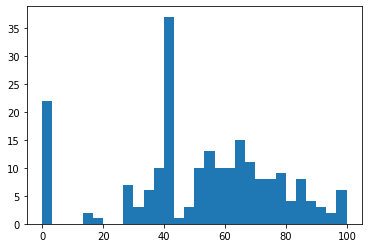

In [91]:
plt.hist([cov_est[c] for c in cov_est], bins=30)

# Original data selection

Selection based on start year cut of 1955

In [33]:
NONBCG = ['Indonesia', 'US', 'Italy', 'Netherlands', 'Belgium', 
          'Lebanon']#, 'Iran', 'Ecuador', 'Andorra', 'Luxembourg']
BCG = ['Croatia', 'Peru', 'Slovenia', 'India', 'Romania', 'Finland', 
       'United Kingdom', 'Poland', 'Turkey', 'Bulgaria', 'Mexico', 
       'Ireland', 'France', 'Bosnia and Herzegovina', 'Austria', 'Denmark', 
       'Brazil']#, 'Germany', 'Jordan', 'Kazakhstan']

# Age Distribution

In [546]:
age_pdf

,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,...,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100+
Country,,,,,,,,,,,,,,,,,,,,,
Burundi,0.172725,0.152943,0.126851,0.102342,0.087696,0.082990,0.073601,0.055873,0.037567,0.025308,...,0.019527,0.016928,0.011634,0.005918,0.003512,0.001839,0.000709,0.000165,0.000022,0.000001
Comoros,0.142029,0.131245,0.116923,0.103027,0.091514,0.081952,0.073219,0.061760,0.049054,0.039534,...,0.026178,0.020163,0.013940,0.008216,0.005191,0.002586,0.000897,0.000199,0.000024,0.000001
Djibouti,0.100366,0.099137,0.089618,0.091879,0.091303,0.088178,0.087339,0.077049,0.067598,0.054792,...,0.036110,0.026648,0.018225,0.014106,0.008495,0.004216,0.001582,0.000387,0.000052,0.000004
Eritrea,0.139597,0.134417,0.137235,0.105439,0.080432,0.080923,0.075930,0.053993,0.039827,0.039363,...,0.023643,0.019293,0.016892,0.013316,0.008419,0.004286,0.001624,0.000436,0.000083,0.000008
Ethiopia,0.146059,0.132616,0.120501,0.112869,0.102179,0.084307,0.065402,0.054574,0.042917,0.035704,...,0.021531,0.017886,0.013642,0.010337,0.006445,0.003234,0.001323,0.000337,0.000047,0.000004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Luxembourg,0.053115,0.052170,0.050291,0.054986,0.063637,0.073003,0.078498,0.078562,0.074372,0.076752,...,0.068170,0.055563,0.043679,0.035501,0.025001,0.019574,0.013379,0.005545,0.001128,0.000101
Netherlands,0.050126,0.052166,0.054725,0.059294,0.059571,0.062839,0.062862,0.059551,0.058648,0.066911,...,0.072972,0.065653,0.058626,0.055585,0.037297,0.025587,0.015276,0.006227,0.001578,0.000173
Switzerland,0.052207,0.050044,0.047335,0.049130,0.055945,0.064190,0.069047,0.071829,0.065960,0.068834,...,0.074396,0.061912,0.051026,0.048705,0.038185,0.026437,0.016731,0.007796,0.001901,0.000196


In [528]:
from scipy import interpolate

In [530]:
age_prob.shape

(21, 201)

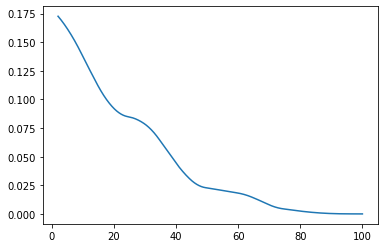

In [536]:
plt.plot(np.linspace(2, 100, 100000), interpolate.interp1d(age_cbins, age_prob[:,0], kind='quadratic')(np.linspace(2, 100, 100000)))

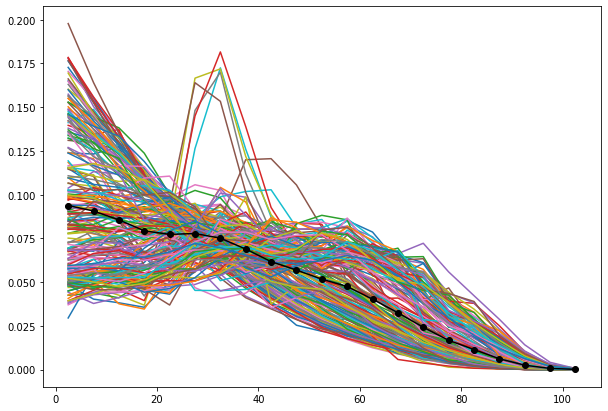

In [201]:
plt.figure(figsize=(10,7))
plt.plot(age_cbins, age_prob);
plt.plot(age_cbins, np.mean(age_prob, axis=1), 'ko-')

## Dowload testing data from Wikipedia (changes daily)

Test data does not have Australia split up. 

It does have Canada split up but using abbreviations.

In [47]:
test_fp = collect.testing()

ValueError: cannot copy sequence with size 7 to array axis with dimension 6

In [ ]:
test = transform.testing()

In [ ]:
test

## Take the intersection of all the DataFrames based on region (in place)

In [51]:
keep = transform.intersect_dfs([test, pop, *THW, *IRD])
len(keep), len(pop)

(63, 63)

# Now all our data in downloaded and transformed into nice DataFrames of the same size

|     |     |     |     |     |     |     |     |
|-----|-----|-----|-----|-----|-----|-----|-----|
|Infected |Recovered | Deaths | Population | Temperature | Humidity | Wind Speed | Test Rate |
|IRD[0] | IRD[1] | IRD[2] | pop| THW[0] | THW[1] | THW[2] | test 